# Reference 
- https://www.kaggle.com/code/arifsetiyawan/rfm-analysis-of-ecommerce-behavior-data

Hi Kagglers,

Welcome to My Kernal about RFM Analysis of eCommerce behavior data

If there are any feedbacks/suggestions you would like to see in the Kernel please let me know. This notebook will always be a work in progress. Please leave any comments about further improvements to the notebook. I appreciate every note!

If you like it, you can upvote and/or leave a comment :)

# **Data Preprocessing**

In [1]:
#Import Library
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import squarify

# **Load The Data**

In [2]:
root_oct = '../../Data/eCommerce-behavior-data/2019-Oct.csv'
root_nov = '../../Data/eCommerce-behavior-data/2019-Nov.csv'

data_oct = pd.read_csv(root_oct,nrows=1)
data_oct

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c


**only load the required data **

In [4]:
data_oct = pd.read_csv(root_oct,nrows=1000000)
data_oct.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [5]:
data_oct['event_type'].unique()

array(['view', 'purchase', 'cart'], dtype=object)

**Column event type have view, cart, and purchase but we only need purchase data so use .loc to get only purchase data**

In [26]:
data=data_oct.loc[data_oct.event_type == 'purchase']
data_oct['event_type'].unique()

array(['purchase'], dtype=object)

**Then union October and November data**

In [27]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
162,2019-10-01 00:02:14 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 00:04:37 UTC,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
379,2019-10-01 00:06:02 UTC,purchase,5100816,2053013553375346967,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
442,2019-10-01 00:07:07 UTC,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
574,2019-10-01 00:09:26 UTC,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553


In [28]:
data.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

In [29]:
data['event_time']=pd.to_datetime(data['event_time']).dt.tz_localize(None) # converting the event_time to datetime format, and removing the timezone

In [31]:
data.dtypes

event_time       datetime64[ns]
event_type               object
product_id                int64
category_id               int64
category_code            object
brand                    object
price                   float64
user_id                   int64
user_session             object
dtype: object

In [32]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
162,2019-10-01 00:02:14,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 00:04:37,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
379,2019-10-01 00:06:02,purchase,5100816,2053013553375346967,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
442,2019-10-01 00:07:07,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
574,2019-10-01 00:09:26,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553


but sometimes the notebook we run crashes so it's better to save the cleaned data into feather format 
more reference about feather you can read it on [here](https://medium.com/@steven.p.dye/feather-files-faster-than-the-speed-of-light-d4666ce24387) or [here](https://arrow.apache.org/docs/python/feather.html)

In [33]:
%%time
#save dataframe as feather in case our notebook got crashed
#feather save column data types
import pyarrow.feather as feather
os.makedirs('tmp', exist_ok=True)  # Make a temp dir for storing the feather file
feather.write_feather(data, './tmp/data')

CPU times: user 15 ms, sys: 14.3 ms, total: 29.3 ms
Wall time: 309 ms


In [34]:
%%time
#load the feather data cause feather more lightweight
data = pd.read_feather('./tmp/data')
data

CPU times: user 9.45 ms, sys: 11.7 ms, total: 21.2 ms
Wall time: 29.1 ms


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
162,2019-10-01 00:02:14,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 00:04:37,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
379,2019-10-01 00:06:02,purchase,5100816,2053013553375346967,None,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
442,2019-10-01 00:07:07,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
574,2019-10-01 00:09:26,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553
...,...,...,...,...,...,...,...,...,...
999366,2019-10-01 16:55:43,purchase,38900019,2085718636156158307,None,None,95.24,550303174,15278f8b-343f-4470-b501-8f70a5b3b590
999528,2019-10-01 16:55:50,purchase,1005008,2053013555631882655,electronics.smartphone,xiaomi,99.87,555716116,95725ae0-8e19-4d61-ae1b-39e08b7e391e
999537,2019-10-01 16:55:50,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,254.11,527587941,d00aa9da-9209-4a1b-9bde-2626183b53fd
999632,2019-10-01 16:55:54,purchase,1004235,2053013555631882655,electronics.smartphone,apple,1184.04,525937902,c7d555aa-d12d-47fe-9752-8930dac255fa


In [35]:
data.dtypes

event_time       datetime64[ns]
event_type               object
product_id                int64
category_id               int64
category_code            object
brand                    object
price                   float64
user_id                   int64
user_session             object
dtype: object

we can see that each session is equal to 1 transaction in terms of sessions being multiples with every product sold
so we need to merge every session together 

In [43]:
session_counts = data.groupby('user_id')['user_session'].nunique()
result = session_counts[session_counts > 1]
filtered_data = data[data['user_id'].isin(result.index)]

In [48]:
filtered_data.sort_values(by=['user_id'])
filtered_data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
513660,2019-10-01 10:35:02,purchase,30000048,2127425436764865054,construction.tools.welding,None,118.90,477886872,b3e47e8d-05d4-4c39-850d-6dd5ff8d4e4c
398371,2019-10-01 08:56:01,purchase,12500527,2053013556277805513,None,crown,47.62,477886872,87baa9be-7c9c-41a0-95e2-3ac7c1433afc
555105,2019-10-01 11:13:16,purchase,3200201,2053013555321504139,appliances.kitchen.meat_grinder,elenberg,46.31,512363712,186030ce-641e-4085-ba4a-5493d2418edb
505444,2019-10-01 10:27:38,purchase,1801766,2053013554415534427,electronics.video.tv,artel,150.70,512363712,b19dc398-c0eb-462a-a60a-e7056fecfc54
893850,2019-10-01 15:52:05,purchase,38400048,2079713971606127501,None,None,7.14,512367874,35c79d7a-a3c8-4a83-9adb-1568db1b6566
...,...,...,...,...,...,...,...,...,...
976921,2019-10-01 16:42:00,purchase,1004870,2053013555631882655,electronics.smartphone,samsung,286.84,555705674,c2723091-8a61-4fe6-92dc-14914bd1d1e5
995540,2019-10-01 16:53:23,purchase,1004870,2053013555631882655,electronics.smartphone,samsung,286.84,555705674,6b1b6291-61ed-4423-904a-1ec4e53b2677
997883,2019-10-01 16:54:48,purchase,1004870,2053013555631882655,electronics.smartphone,samsung,286.84,555705674,6b1b6291-61ed-4423-904a-1ec4e53b2677
959731,2019-10-01 16:31:42,purchase,1801995,2053013554415534427,electronics.video.tv,haier,193.03,555705915,90d0a870-ec71-4def-b1a6-17c3d9aa2d02


You can see that one user can have multiple sessions.

In [50]:
data.groupby('user_session').agg(user_id=('user_id', 'count'))

,user_id
user_session,
0002c5ea-3509-4d0b-9618-7e40925005f0,1
000fdfe4-e1f0-4a93-9c22-f04066ad895e,1
001226df-03c7-41e6-a9c4-7d0233348bd5,1
001a0d5b-5b97-4a48-8494-67c1cacc8c97,1
002ccd2c-50f7-4122-963b-fb6a907e414c,2
...,...
ffd484e5-537a-47d5-9274-28c2bb4bd6f0,1
ffd500d6-4d3c-4c3b-aa2c-e9b58463dee4,1
ffd82958-73c8-4209-8ad9-80451e058704,1


In [59]:
result = data.groupby(by='user_session').agg(order_time=('event_time',lambda x: x))
result

,order_time
user_session,
0002c5ea-3509-4d0b-9618-7e40925005f0,2019-10-01 06:10:46
000fdfe4-e1f0-4a93-9c22-f04066ad895e,2019-10-01 13:37:06
001226df-03c7-41e6-a9c4-7d0233348bd5,2019-10-01 14:13:11
001a0d5b-5b97-4a48-8494-67c1cacc8c97,2019-10-01 08:31:51
002ccd2c-50f7-4122-963b-fb6a907e414c,"[2019-10-01 05:47:47, 2019-10-01 05:49:27]"
...,...
ffd484e5-537a-47d5-9274-28c2bb4bd6f0,2019-10-01 07:57:39
ffd500d6-4d3c-4c3b-aa2c-e9b58463dee4,2019-10-01 11:23:22
ffd82958-73c8-4209-8ad9-80451e058704,2019-10-01 16:23:37


In [63]:
specific_session = '002ccd2c-50f7-4122-963b-fb6a907e414c'
data[data['user_session'] == specific_session]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
178861,2019-10-01 05:47:47,purchase,1004665,2053013555631882655,electronics.smartphone,samsung,871.07,532770412,002ccd2c-50f7-4122-963b-fb6a907e414c
180632,2019-10-01 05:49:27,purchase,1004653,2053013555631882655,electronics.smartphone,samsung,636.05,532770412,002ccd2c-50f7-4122-963b-fb6a907e414c


You can see that there are 2 rows with the same user_session, but the event_time is different. This means that the user has made 2 purchases in the same session.

In [73]:
result = data.groupby(by='user_session').agg(Date_order=('event_time',lambda x: x.max()), 
                                    user_id=('user_id',lambda x: x), 
                                    order_count=('user_session',lambda x: x.count()), 
                                    price=('price',lambda x: x.sum()))
result

,Date_order,user_id,order_count,price
user_session,,,,
0002c5ea-3509-4d0b-9618-7e40925005f0,2019-10-01 06:10:46,541539898,1,9.76
000fdfe4-e1f0-4a93-9c22-f04066ad895e,2019-10-01 13:37:06,520206104,1,259.98
001226df-03c7-41e6-a9c4-7d0233348bd5,2019-10-01 14:13:11,516675926,1,1619.09
001a0d5b-5b97-4a48-8494-67c1cacc8c97,2019-10-01 08:31:51,541146978,1,383.51
002ccd2c-50f7-4122-963b-fb6a907e414c,2019-10-01 05:49:27,"[532770412, 532770412]",2,1507.12
...,...,...,...,...
ffd484e5-537a-47d5-9274-28c2bb4bd6f0,2019-10-01 07:57:39,549516290,1,453.27
ffd500d6-4d3c-4c3b-aa2c-e9b58463dee4,2019-10-01 11:23:22,515581326,1,413.14
ffd82958-73c8-4209-8ad9-80451e058704,2019-10-01 16:23:37,512440842,1,975.57


In [77]:
result_gt_1 = result[result['order_count'] > 1]
result_gt_1

,Date_order,user_id,order_count,price
user_session,,,,
002ccd2c-50f7-4122-963b-fb6a907e414c,2019-10-01 05:49:27,"[532770412, 532770412]",2,1507.12
003c3709-b084-464f-9cd7-4baef596a8e6,2019-10-01 14:46:57,"[514242794, 514242794, 514242794]",3,107.57
00582c03-360f-444c-ab30-1cce657e4333,2019-10-01 05:37:46,"[512850441, 512850441]",2,2363.00
0059819e-af2c-418d-9207-dc546c2577ce,2019-10-01 14:29:37,"[538959288, 538959288]",2,1166.56
006efdc9-a7cf-4d2f-97a4-0ff858b35626,2019-10-01 08:45:03,"[555551770, 555551770]",2,1049.93
...,...,...,...,...
ff0000ac-57ba-4457-ba85-1752f857f8d0,2019-10-01 08:06:50,"[514638094, 514638094]",2,283.14
ff20239b-1dbb-4268-b1bc-7b9102f4bbec,2019-10-01 14:18:37,"[512363973, 512363973]",2,25.68
ff26e203-3a5e-4236-bb1e-2bed7b1104bf,2019-10-01 14:57:37,"[555566178, 555566178]",2,133.59


We hope column user_id is unique. 

In [83]:
result = data.groupby(by='user_session').agg(Date_order=('event_time',lambda x: x.max()), 
                                    user_id=('user_id',lambda x: x.max()), # make sure the user_id is unique, [532770412, 532770412] ->  532770412
                                    order_count=('user_session',lambda x: x.count()), 
                                    price=('price',lambda x: x.sum()))
result[result['order_count'] > 1]

,Date_order,user_id,order_count,price
user_session,,,,
002ccd2c-50f7-4122-963b-fb6a907e414c,2019-10-01 05:49:27,532770412,2,1507.12
003c3709-b084-464f-9cd7-4baef596a8e6,2019-10-01 14:46:57,514242794,3,107.57
00582c03-360f-444c-ab30-1cce657e4333,2019-10-01 05:37:46,512850441,2,2363.00
0059819e-af2c-418d-9207-dc546c2577ce,2019-10-01 14:29:37,538959288,2,1166.56
006efdc9-a7cf-4d2f-97a4-0ff858b35626,2019-10-01 08:45:03,555551770,2,1049.93
...,...,...,...,...
ff0000ac-57ba-4457-ba85-1752f857f8d0,2019-10-01 08:06:50,514638094,2,283.14
ff20239b-1dbb-4268-b1bc-7b9102f4bbec,2019-10-01 14:18:37,512363973,2,25.68
ff26e203-3a5e-4236-bb1e-2bed7b1104bf,2019-10-01 14:57:37,555566178,2,133.59


In [84]:
data = result

# **RFM Analysis**

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.

RFM stands for the three dimensions:

* Recency – How recently did the customer purchase?
* Frequency – How often do they purchase?
* Monetary Value – How much do they spend?

source: [wikipedia](https://en.wikipedia.org/wiki/RFM_(market_research))

so we will make that 3 attribute Recency, Frequency, and Monetary

In [85]:
data['Date_order'].max()

Timestamp('2019-10-01 16:56:04')

The last date we have is 2019-10-1 so we will use date 2019-12-2 as reference

In [100]:
import datetime as dt
study_date = dt.datetime(2019,10,2)
data=pd.DataFrame(data)
data['last_purchase']=study_date - data['Date_order']
# data['last_purchase'].astype('timedelta64[D]')
data['last_purchase_days'] = data['last_purchase'] / np.timedelta64(1, 'D')  # 將時間差轉換為天數
# data['last_purchase_days'] = data['last_purchase_days'].round().astype(int)  # make it int 
data.head()

,Date_order,user_id,order_count,price,last_purchase,last_purchase_days
user_session,,,,,,
0002c5ea-3509-4d0b-9618-7e40925005f0,2019-10-01 06:10:46,541539898,1,9.76,0 days 17:49:14,0.742523
000fdfe4-e1f0-4a93-9c22-f04066ad895e,2019-10-01 13:37:06,520206104,1,259.98,0 days 10:22:54,0.432569
001226df-03c7-41e6-a9c4-7d0233348bd5,2019-10-01 14:13:11,516675926,1,1619.09,0 days 09:46:49,0.407512
001a0d5b-5b97-4a48-8494-67c1cacc8c97,2019-10-01 08:31:51,541146978,1,383.51,0 days 15:28:09,0.644549
002ccd2c-50f7-4122-963b-fb6a907e414c,2019-10-01 05:49:27,532770412,2,1507.12,0 days 18:10:33,0.757326


In [111]:
RFM = data.groupby('user_id').agg(Recency=('last_purchase_days',lambda x: x.min()), # 不用 min 結果不變，只是擔心會有 list 如果直接使用 x    
                            Frequency=('user_id',lambda x: x.count()), # 不用 count 結果不變，只是擔心會有 list 如果直接使用 x 
                            Monetary=('price',lambda x: x.sum()))
RFM.head()

,Recency,Frequency,Monetary
user_id,,,
440756116,0.533310,1,39.64
451971397,0.599144,1,199.17
453705583,0.662674,1,141.57
457360398,0.817442,1,51.46
469200473,0.633206,1,615.56


# **Frequency**

Frequency attribute answers the question: How often do they purchase?

In [112]:
RFM['Frequency'].describe()

count    12452.000000
mean         1.149695
std          0.507669
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: Frequency, dtype: float64

# **Monetary**

Monetary attribute answers the question: How much do they spend overtime?


In [113]:
RFM['Recency'].describe()

count    12452.000000
mean         0.590278
std          0.161458
min          0.294398
25%          0.457899
50%          0.598385
75%          0.721241
max          0.995810
Name: Recency, dtype: float64

# **RFM Segmentation**

RFM segmentation is a useful tool for identifying groups of clients who should be given extra attention. RFM segmentation enables marketers to target specific groups of customers with communications that are far more relevant to their unique behaviors, resulting in improved response rates, enhanced loyalty, and increased customer lifetime value. RFM segmentation is a method for segmenting data, just like other approaches. 

The simplest way to create customers segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

**RFM Quartiles**

In [22]:
RFM.quantile(q=[0.25,0.5,0.75])

,Recency,Frequency,Monetary
0.25,12.871965,1.0,118.38
0.50,20.587141,1.0,257.15
0.75,39.693811,2.0,669.23


In [23]:
quartiles=RFM.quantile(q=[0.25,0.5,0.75]).to_dict()
quartiles

{'Recency': {0.25: 12.871964699074075,
  0.5: 20.587141203703705,
  0.75: 39.69381076388889},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'Monetary': {0.25: 118.38, 0.5: 257.15, 0.75: 669.23}}

# **Creation of RFM Segments**

In [24]:
## for Recency 

def R(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Frequency and Monetary 

def FM(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1    
    

In [25]:
#create RFM segmentation column
RFM['R_Quartile'] = RFM['Recency'].apply(R, args=('Recency',quartiles,))
RFM['F_Quartile'] = RFM['Frequency'].apply(FM, args=('Frequency',quartiles,))
RFM['M_Quartile'] = RFM['Monetary'].apply(FM, args=('Monetary',quartiles,))
RFM['RFM_segmentation'] = RFM.R_Quartile.map(str) \
                    + RFM.F_Quartile.map(str) \
                    + RFM.M_Quartile.map(str)
RFM['RFM_score'] = RFM.R_Quartile.map(int) \
                    + RFM.F_Quartile.map(int) \
                    + RFM.M_Quartile.map(int)
RFM.head()


,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score
user_id,,,,,,,,
138340325,19.758866,1,93.50,2,4,4,244,10
225644257,18.819780,1,40.91,2,4,4,244,10
253299396,24.546169,1,246.85,3,4,3,343,10
256164170,10.651921,1,113.23,1,4,4,144,9
264649825,55.141539,2,1240.04,4,2,1,421,7


In [26]:
# Define rfm_level function
def RFM_label(data):
    if data['RFM_score'] >= 10:
        return 'Lost'
    elif ((data['RFM_score'] >= 9) and (data['RFM_score'] < 10)):
        return 'Hibernating'
    elif ((data['RFM_score'] >= 8) and (data['RFM_score'] < 9)):
        return 'Can’t Lose Them'
    elif ((data['RFM_score'] >= 7) and (data['RFM_score'] < 8)):
        return 'About To Sleep'
    elif ((data['RFM_score'] >= 6) and (data['RFM_score'] < 7)):
        return 'Promising'
    elif ((data['RFM_score'] >= 5) and (data['RFM_score'] < 6)):
        return 'Potential Loyalist'
    elif ((data['RFM_score'] >= 4) and (data['RFM_score'] < 5)):
        return 'Loyal Customers'
    else:
        return 'Champions'
#Create RFM label for customer
RFM['RFM_label'] = RFM.apply(RFM_label, axis=1)
RFM.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score,RFM_label
user_id,,,,,,,,,
138340325,19.758866,1,93.50,2,4,4,244,10,Lost
225644257,18.819780,1,40.91,2,4,4,244,10,Lost
253299396,24.546169,1,246.85,3,4,3,343,10,Lost
256164170,10.651921,1,113.23,1,4,4,144,9,Hibernating
264649825,55.141539,2,1240.04,4,2,1,421,7,About To Sleep


How many customers do we have in each segment?


In [27]:
# Calculate average values for each RFM_Level, and return a size of each segment 
RFM_desc = RFM.groupby('RFM_label').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(RFM_desc)

                   Recency Frequency Monetary        
                      mean      mean     mean   count
RFM_label                                            
About To Sleep        20.5       1.7    628.8   71309
Can’t Lose Them       19.9       1.3    406.9   90809
Champions              5.1       7.9   3777.5   37405
Hibernating           22.5       1.1    309.2  114053
Lost                  38.6       1.0    141.1  231538
Loyal Customers       10.4       4.3   1897.9   40675
Potential Loyalist    16.8       3.5   1468.7   52728
Promising             21.1       2.5   1009.3   58953


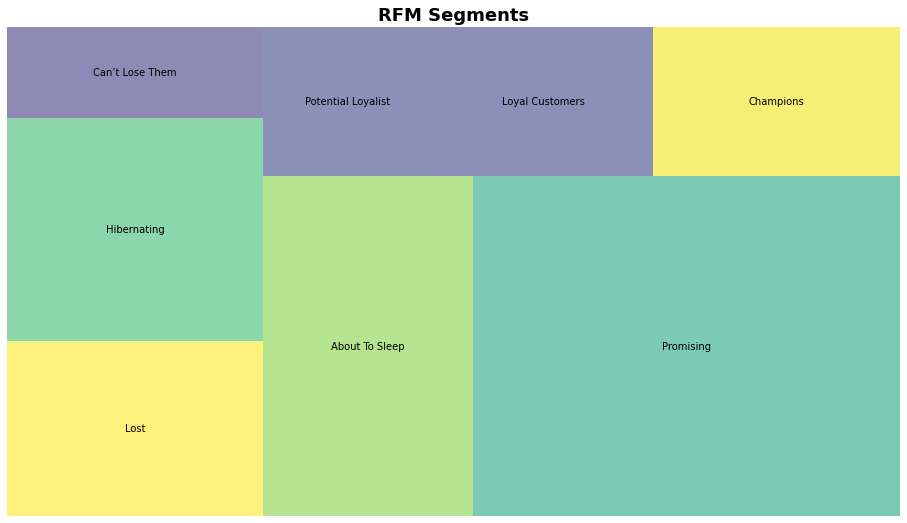

In [28]:
RFM_desc.columns = RFM_desc.columns.droplevel()
RFM_desc.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=RFM_desc['Count'], 
              label=['Lost',
                     'Hibernating',
                     'Can’t Lose Them',
                     'About To Sleep',
                     'Promising', 
                     'Potential Loyalist', 
                     'Loyal Customers',
                     'Champions'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

Now that we've identified our customer categories, we can decide how to approach or deal with each customer.

* Champions : Reward them. Can be early adopters of new products. Will promote your brand. Most likely to send referrals.
* Loyal Customer : Upsell higher value products. Ask for reviews.
* Potential Loyalist : Offer membership / loyalty program. Keep them engaged. Offer personalised recommendations.
* Promising : Offer coupons. Bring them back to the platform and keep them engaged. Offer personalised recommendations.
* About to Sleep : Win them back via renewals or newer products, don’t lose them to competition. Talk to them if necessary. Spend time on highest possible personalisation.
* Can't Lose Them : Provide helpful resources on the site. Send personalised emails.
* Hibernating : Make subject lines of emails very personalised. Revive their interest by a specific discount on a specific product.
* Lost : Revive interest with reach out campaign. Ignore otherwise.

reference : [here](https://docs.exponea.com/docs/rfm-segmentation)